## Imports & Load Data

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
import researchpy as rp
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [3]:
df = pd.read_csv('step0_results.csv', na_values=['no info', '.'], delimiter=',')

## Prepare Table for Statistical Analysis

In [4]:
new_columns = ['date']

for i in range(1, 10):
    for j in range(1, 13):
        new_columns.append(str(i)+str(j))

new_columns.append('feedback')
df.columns = new_columns
df.drop(['date', 'feedback'], axis=1, inplace=True)

In [5]:
df.replace('Strongly disagree', 1, inplace=True)
df.replace('Disagree', 2, inplace=True)
df.replace('Neutral', 3, inplace=True)
df.replace('Agree', 4, inplace=True)
df.replace('Strongly Agree', 5, inplace=True)

df.replace('< 5 min', 1, inplace=True)
df.replace('5 - 15 min', 2, inplace=True)
df.replace('15 - 30 min', 3, inplace=True)
df.replace('30 - 60 min', 4, inplace=True)
df.replace('> 60 min', 5, inplace=True)

In [6]:
# multiplication of values with 1 or -1 depending on the question effect
for column in df:
    r = int(column)%10
    if r == 7 or r == 8 or r == 9 or r == 0:
        #df[column] = df[column]*(-1) # for having negative effect of question
        df[column] = 6 - df[column]

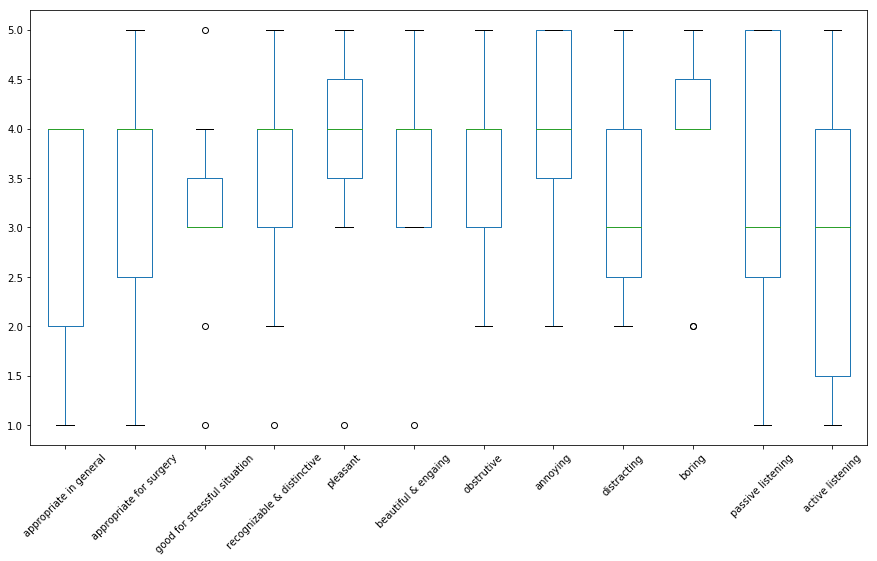

In [25]:
input_boxplot_nature_three = df.iloc[:, 24:36]
input_boxplot_nature_three.columns = ['appropriate in general', 'appropriate for surgery', 
                                      'good for stressful situation', 'recognizable & distinctive', 
                                      'pleasant', 'beautiful & engaing', 'obstrutive', 'annoying', 
                                      'distracting', 'boring', 'passive listening', 'active listening']
boxplot_nature_three = input_boxplot_nature_three.boxplot(column=['appropriate in general', 'appropriate for surgery', 
                                      'good for stressful situation', 'recognizable & distinctive', 
                                      'pleasant', 'beautiful & engaing', 'obstrutive', 'annoying', 
                                      'distracting', 'boring', 'passive listening', 'active listening'], 
                                                          rot=45,
                                                          grid=False, 
                                                          figsize=(15, 8))


## Sum Points Over Questions

In [ ]:
sumOverAll = np.nan
sumOverAll = df.sum(axis = 0)
#sumOverAll

In [ ]:
sum_over_q = np.empty([1,9], dtype=int)

for i in range(9):
    sum_over_q[0,i] = sumOverAll[i*12:(i*12)+12].sum(axis=0)

In [ ]:
sum_over_questions_per_son = pd.DataFrame(sum_over_q, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9'])
sum_over_questions_per_son

In [ ]:
qs = np.empty([1,len(df.columns)], dtype=int)

for i in range(len(df.columns)):
    qs[:,i] = df.iloc[:,i].sum()
qs

## ANOVA

In [ ]:
input_for_anova = np.empty([9, 10], dtype=int)

for i in range(9):
    for j in range(10):
        input_for_anova[i, j] = df.iloc[j, i*12:(i*12)+12].sum(axis=0)

ones = [1,1,1,1,1,1,1,1,1,1]
twos = [2,2,2,2,2,2,2,2,2,2]
threes = [3,3,3,3,3,3,3,3,3,3]
group = np.concatenate((np.asarray(ones), np.asarray(twos), np.asarray(threes)), axis=0)

input_for_anova

### ANOVA for Nature

In [ ]:
input_for_anova_nature = pd.DataFrame(data=input_for_anova[0:3,])
input_for_anova_nature = np.transpose(input_for_anova_nature)
anova_nature = input_for_anova_nature[0].append(input_for_anova_nature[1]).append(input_for_anova_nature[2]).reset_index(drop=True)
nature = pd.DataFrame(data={'effect': anova_nature, 'group': group})

In [ ]:
results_nature = ols('effect ~ C(group)', data=nature).fit()
results_nature.summary()

In [ ]:
rp.summary_cont(nature['effect'])

In [ ]:
rp.summary_cont(nature['effect'].groupby(nature['group']))

In [ ]:
aov_table_nature = sm.stats.anova_lm(results_nature, typ=2)
aov_table_nature

In [ ]:
mc_nature = MultiComparison(nature['effect'], nature['group'])
mc_results_nature = mc_nature.tukeyhsd()
print(mc_results_nature)

#### BONFERRONI CORRECTION POST-HOC COMPARISON

In [ ]:
corrected_p_value = 0.05/3
corrected_p_value

In [ ]:
stats.ttest_ind(nature['effect'][nature['group'] == 1], nature['effect'][nature['group'] == 2])

In [ ]:
stats.ttest_ind(nature['effect'][nature['group'] == 2], nature['effect'][nature['group'] == 3])

In [ ]:
stats.ttest_ind(nature['effect'][nature['group'] == 1], nature['effect'][nature['group'] == 3])

### ANOVA for Algo_Music

In [ ]:
input_for_anova_algomus = pd.DataFrame(data=input_for_anova[3:6,])
input_for_anova_algomus = np.transpose(input_for_anova_algomus)
anova_algomus = input_for_anova_algomus[0].append(input_for_anova_algomus[1]).append(input_for_anova_algomus[2]).reset_index(drop=True)
algomus = pd.DataFrame(data={'effect': anova_algomus, 'group': group})

In [ ]:
results_algomus = ols('effect ~ C(group)', data=algomus).fit()
results_algomus.summary()

In [ ]:
aov_table_algomus = sm.stats.anova_lm(results_algomus, typ=2)
aov_table_algomus

In [ ]:
rp.summary_cont(algomus['effect'])

In [ ]:
rp.summary_cont(algomus['effect'].groupby(algomus['group']))

In [ ]:
mc_algomus = MultiComparison(algomus['effect'], algomus['group'])
mc_results_algomus = mc_algomus.tukeyhsd()
print(mc_results_algomus)

#### BONFERRONI CORRECTION POST-HOC COMPARISON

In [ ]:
stats.ttest_ind(algomus['effect'][algomus['group'] == 1], algomus['effect'][algomus['group'] == 2])

In [ ]:
stats.ttest_ind(algomus['effect'][algomus['group'] == 2], algomus['effect'][algomus['group'] == 3])

In [ ]:
stats.ttest_ind(algomus['effect'][algomus['group'] == 1], algomus['effect'][algomus['group'] == 3])

### ANOVA for Japan

In [ ]:
input_for_anova_japan = pd.DataFrame(data=input_for_anova[6:9,])
input_for_anova_japan = np.transpose(input_for_anova_japan)
anova_japan = input_for_anova_japan[0].append(input_for_anova_japan[1]).append(input_for_anova_japan[2]).reset_index(drop=True)
japan = pd.DataFrame(data={'effect': anova_japan, 'group': group})

In [ ]:
results_japan = ols('effect ~ C(group)', data=japan).fit()
results_japan.summary()

In [ ]:
aov_table_japan = sm.stats.anova_lm(results_japan, typ=2)
aov_table_japan

In [ ]:
rp.summary_cont(japan['effect'])

In [ ]:
rp.summary_cont(japan['effect'].groupby(japan['group']))

In [ ]:
mc_japan = MultiComparison(japan['effect'], japan['group'])
mc_results_japan = mc_japan.tukeyhsd()
print(mc_results_japan)

#### BONFERRONI CORRECTION POST-HOC COMPARISON

In [ ]:
stats.ttest_ind(japan['effect'][japan['group'] == 1], japan['effect'][japan['group'] == 2])

In [ ]:
stats.ttest_ind(japan['effect'][japan['group'] == 2], japan['effect'][japan['group'] == 3])

In [ ]:
stats.ttest_ind(japan['effect'][japan['group'] == 1], japan['effect'][japan['group'] == 3])